<a href="https://colab.research.google.com/github/itsdivya1309/ML_Algos/blob/master/Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree

You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.


---
### 1. Import modules, libraries and dataset


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

! pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 3.4 MB/s eta 0:00:00


In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d pablomgomez21/drugs-a-b-c-x-y-for-decision-trees

  0% 0.00/1.68k [00:00<?, ?B/s]
100% 1.68k/1.68k [00:00<00:00, 6.05MB/s]


In [3]:
! unzip drugs-a-b-c-x-y-for-decision-trees.zip

Archive:  drugs-a-b-c-x-y-for-decision-trees.zip
  inflating: drug200.csv             


In [4]:
df = pd.read_csv('drug200.csv')

In [5]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### 2. Exploratory Data Analysis

In [6]:
df.shape

(200, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [9]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [10]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [11]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [12]:
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

### 3. Create training and test set

In [38]:
X = df.drop(['Drug'], axis = 1)
y = df['Drug']

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.15,
                                                 random_state = 42)

In [40]:
X_train.shape, X_test.shape

((170, 5), (30, 5))

### 4. Feature Engineering

In [41]:
# Check data types in X_train

X_train.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
dtype: object

**Encode categorical variables**

* Nominal feature:
1. Sex
* Ordinal features:
1. BP
2. Cholesterol

In [42]:
import category_encoders as ce

# encode with nominal encoding
ohe = ce.OneHotEncoder(cols = ['Sex'])

X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)

In [44]:
X_train.head()

# I need to change the name of Sex_1, Sex_2 to 'M' and 'F'
#for better readability.

,Age,Sex_1,Sex_2,BP,Cholesterol,Na_to_K
9,43,1,0,LOW,NORMAL,19.368
18,23,1,0,LOW,HIGH,7.298
55,26,0,1,LOW,HIGH,14.160
75,26,1,0,LOW,NORMAL,20.909
150,49,1,0,HIGH,NORMAL,8.700


In [45]:
X_test.head()

,Age,Sex_1,Sex_2,BP,Cholesterol,Na_to_K
95,36,1,0,LOW,NORMAL,11.424
15,16,0,1,HIGH,NORMAL,15.516
30,18,0,1,NORMAL,NORMAL,8.750
158,59,0,1,LOW,HIGH,10.444
128,47,1,0,LOW,NORMAL,33.542


In [46]:
# encode with ordinal encoding

ordinal = ce.OrdinalEncoder(cols=['BP','Cholesterol'])

X_train = ordinal.fit_transform(X_train)
X_test = ordinal.transform(X_test)

In [47]:
X_train.head()

,Age,Sex_1,Sex_2,BP,Cholesterol,Na_to_K
9,43,1,0,1,1,19.368
18,23,1,0,1,2,7.298
55,26,0,1,1,2,14.160
75,26,1,0,1,1,20.909
150,49,1,0,2,1,8.700


In [48]:
X_test.head()

,Age,Sex_1,Sex_2,BP,Cholesterol,Na_to_K
95,36,1,0,1,1,11.424
15,16,0,1,2,1,15.516
30,18,0,1,3,1,8.750
158,59,0,1,1,2,10.444
128,47,1,0,1,1,33.542


### 5. Decision Tree Classifier with criterion gini index

In [49]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [50]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3,
                                  random_state = 42)

# fit the model
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [51]:
# predict test results

y_pred_gini = clf_gini.predict(X_test)

In [52]:
# Check accuracy score

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred_gini))

0.7333333333333333


In [53]:
y_pred_train_gini = clf_gini.predict(X_train)
print(accuracy_score(y_train,y_pred_train_gini))

0.8470588235294118


[Text(0.6666666666666666, 0.875, 'x[5] <= 14.829\ngini = 0.686\nsamples = 170\nvalue = [20, 13, 13, 44, 80]'),
 Text(0.5, 0.625, 'x[3] <= 2.5\ngini = 0.67\nsamples = 90\nvalue = [20, 13, 13, 44, 0]'),
 Text(0.3333333333333333, 0.375, 'x[3] <= 1.5\ngini = 0.739\nsamples = 59\nvalue = [20, 13, 13, 13, 0]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.5\nsamples = 26\nvalue = [0, 0, 13, 13, 0]'),
 Text(0.5, 0.125, 'gini = 0.478\nsamples = 33\nvalue = [20, 13, 0, 0, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 0, 31, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 80\nvalue = [0, 0, 0, 0, 80]')]

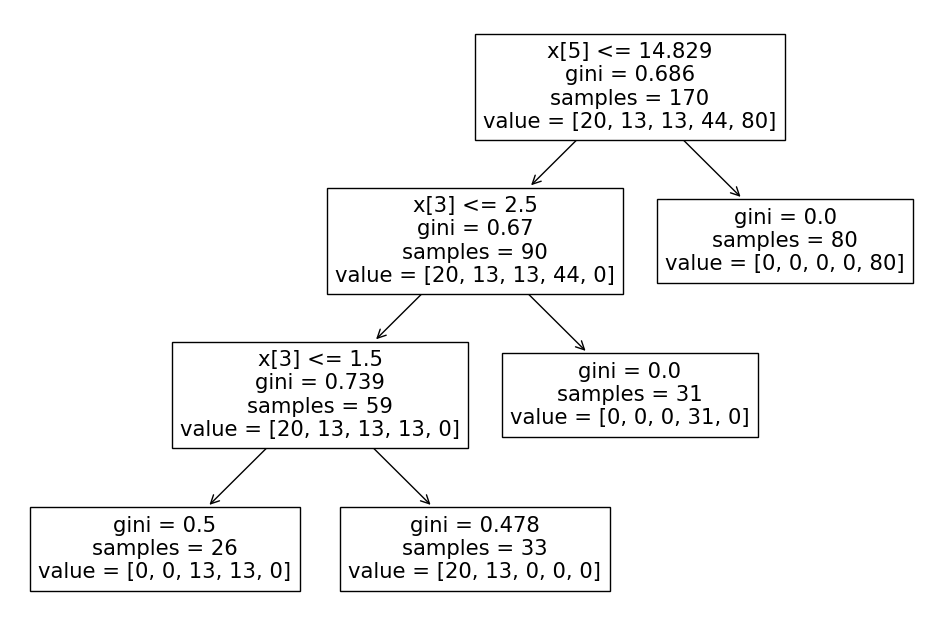

In [54]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

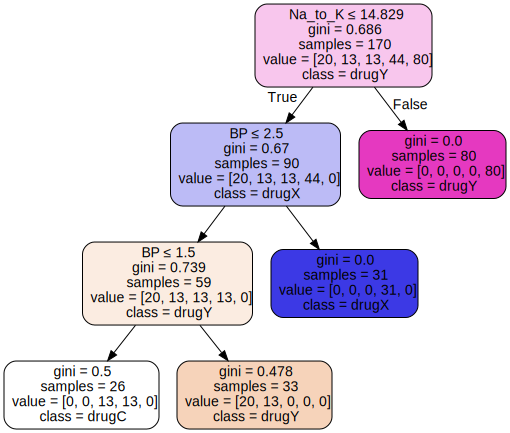

In [55]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

### 6. Decision Tree Classifier with criterion entropy

In [63]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                random_state=42)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [64]:
y_pred_en = clf_en.predict(X_test)

print(accuracy_score(y_pred_en,y_test))

1.0


In [65]:
y_pred_train_en = clf_en.predict(X_train)

print(accuracy_score(y_pred_train_en,y_train))

1.0


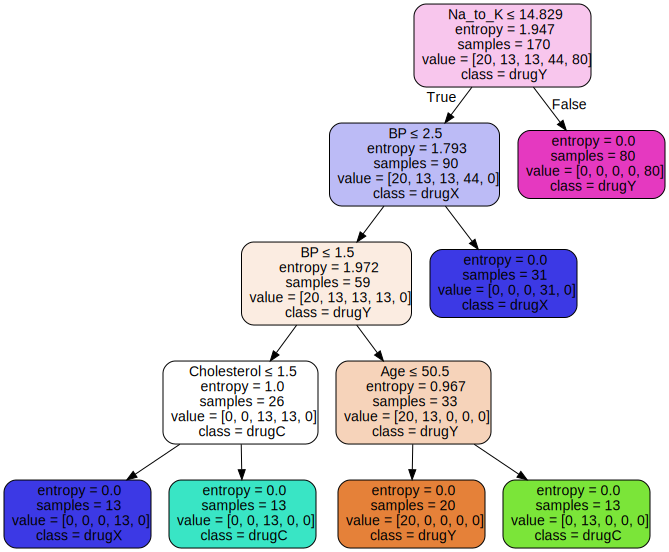

In [66]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [67]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm_en = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 3  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0 11]]


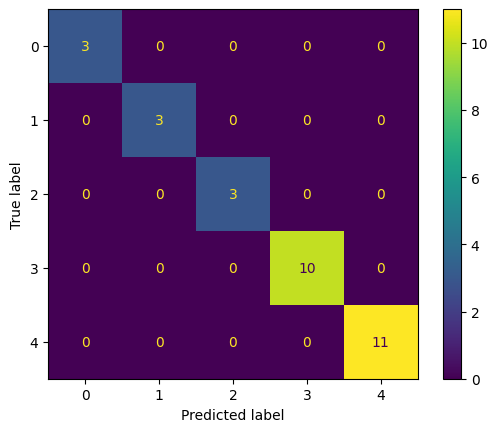

In [68]:
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = cm_en)
cm_display.plot()

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         3
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        10
       drugY       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [70]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

       drugA       0.50      1.00      0.67         3
       drugB       0.00      0.00      0.00         3
       drugC       0.38      1.00      0.55         3
       drugX       1.00      0.50      0.67        10
       drugY       1.00      1.00      1.00        11

    accuracy                           0.73        30
   macro avg       0.57      0.70      0.58        30
weighted avg       0.79      0.73      0.71        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
cm_gini = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm_gini)

Confusion matrix

 [[ 3  0  0  0  0]
 [ 3  0  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  5  5  0]
 [ 0  0  0  0 11]]


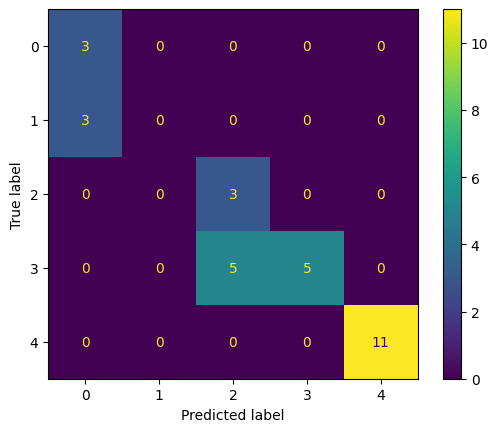

In [72]:
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = cm_gini)
cm_display.plot()